# Rossman Store Sales Prediction

## Steps:
1. Explatory Data Analysis


#### Used dataset is **rossmann store data**. It operates over 3,000 drug stores in 7 European countries. The challenge is to predict their daily sales for up to six weeks in advance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
store = pd.read_csv('../data/preprocessed_store.csv')
train = pd.read_csv('../data/preprocessed_train.csv', index_col='Date', parse_dates=True)
test = pd.read_csv('../data/preprocessed_test.csv')


C:\Users\jerry\AppData\Local\Temp\ipykernel_29896\642032595.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/preprocessed_train.csv', index_col='Date', parse_dates=True)


#### View the graph of sales data from January 2013 to month 2015 for the store with serial number 1 to get a visual sense of the overall character of the change in the data.

In [3]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#### Display shapes of the datasets

In [6]:
print(train.shape, test.shape, store.shape)

(1017209, 8) (41088, 8) (1115, 10)


## Exploratory Data Analysis


In [7]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekofYear'] = train.index.isocalendar().week
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

#### Check when the store was closed

In [8]:
train_store_closed = train[(train.Open == 0)]
print(train_store_closed.head())

            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    292          5      0          0     0      1            0   
2015-07-31    876          5      0          0     0      1            0   
2015-07-30    292          4      0          0     0      1            0   
2015-07-30    876          4      0          0     0      1            0   
2015-07-29    292          3      0          0     0      1            0   

            SchoolHoliday  Year  Month  Day  WeekofYear  SalesPerCustomer  
Date                                                                       
2015-07-31              1  2015      7   31          31               NaN  
2015-07-31              1  2015      7   31          31               NaN  
2015-07-30              1  2015      7   30          31               NaN  
2015-07-30              1  2015      7   30          31               NaN  
2015-07-29 

#### Plot histogram of the days when the store was closed

<Axes: >

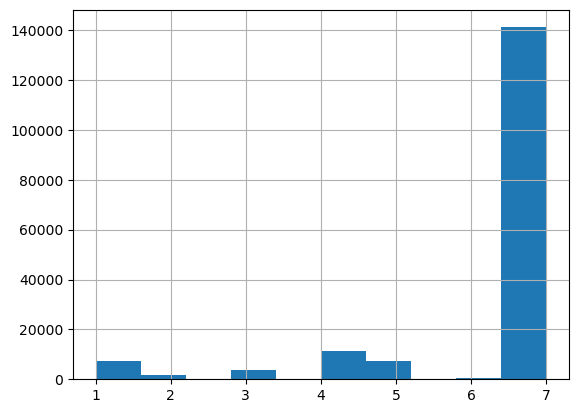

In [9]:
train_store_closed['DayOfWeek'].hist()

From this chart, we could see that, 7th day store was mostly clodes. It is Sunday and makes sense.

#### Check whether the school was closed for holidays

<Axes: xlabel='SchoolHoliday'>

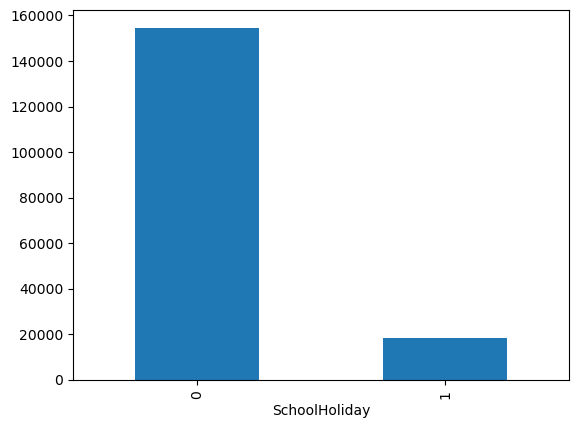

In [10]:
train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar')

Here 1 is school closed day and it pretty low. And 0 is None.

<Axes: xlabel='StateHoliday'>

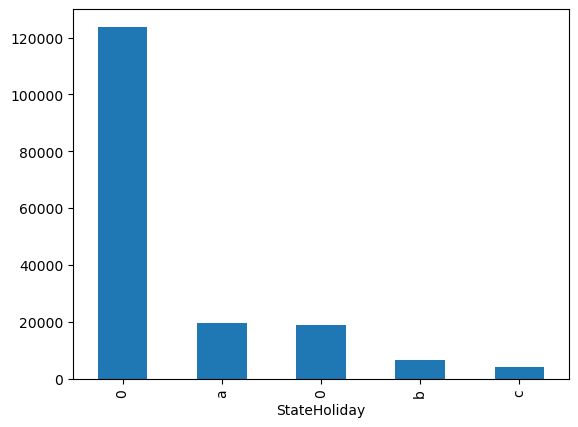

In [11]:
train_store_closed['StateHoliday'].value_counts().plot(kind='bar')


Here, The state is closed for (a= Public holyday, b = Easter holyday, c = Christmas and 0 is None)

#### Number of days with closed stores

In [12]:
train[(train.Open == 0)].shape[0]

172817

#### Check the number of days that store open but sales zero

In [13]:
train[(train.Open == 1) & (train.Sales == 0)].shape[0]

54

<Axes: >

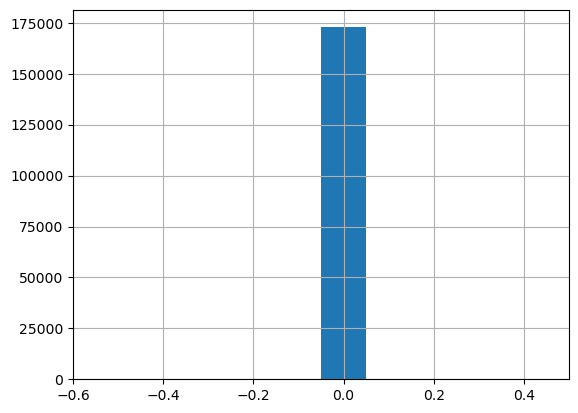

In [14]:
train.loc[train.Open==0].Sales.hist(align='left')

Finding: when the store is closed, the daily sales are necessarily 0.


The skewness of Sales is 1.5939220392699809


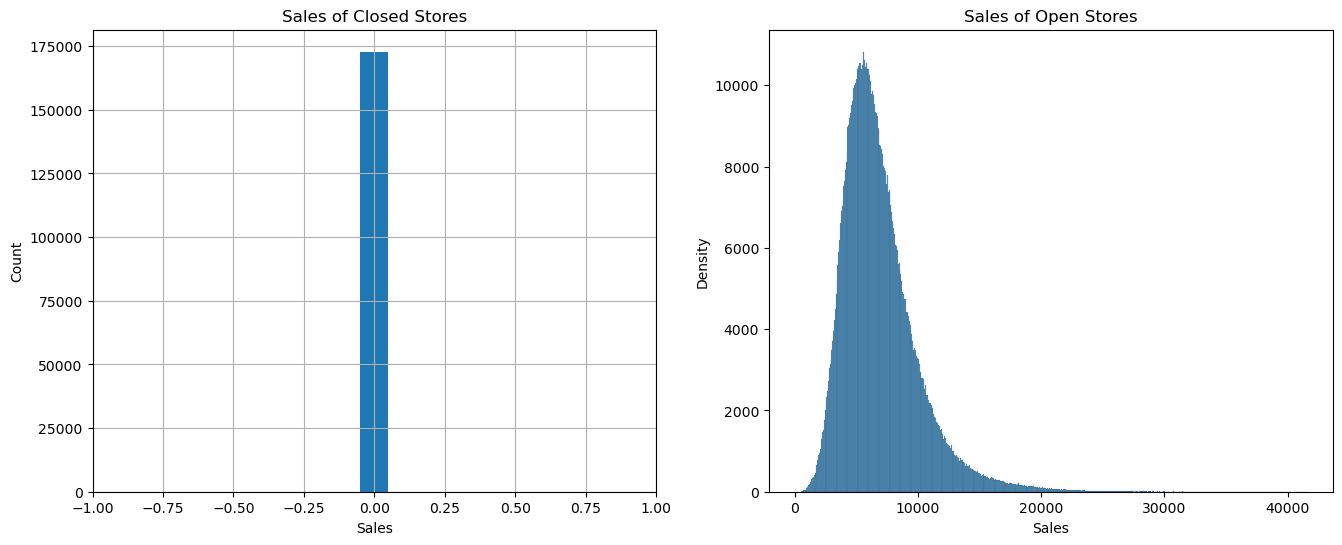

In [15]:
fig = plt.figure(figsize=(16,6))

# Sales of Closed Stores
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Count')
ax1.set_title('Sales of Closed Stores')
plt.xlim(-1,1)
train.loc[train.Open==0].Sales.hist(align='left', ax=ax1)

# Sales of Open Stores with histplot
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Density')
ax2.set_title('Sales of Open Stores')
sns.histplot(train.loc[train.Open!=0].Sales, ax=ax2)  # kde=True adds the density line

# Calculating skewness
skewness = train.loc[train.Open!=0].Sales.skew()
print('The skewness of Sales is {}'.format(skewness))

After removing the data when the store is closed, re-plot the daily sales distribution when the store is opened. It can be found that the daily sales show an obvious skewed distribution, with a skewness of about , which is much larger than , and we will consider making preprocessing adjustments to the data distribution.

#### In the following, we only use the data when the store is open (Open!=0 ) for training.

In [16]:
train = train.loc[train.Open != 0]
train = train.loc[train.Sales > 0].reset_index(drop=True)
train.shape

(844338, 13)

### 2.1 Line graph

We have used matplotlib.pyplot to plot the sales data of the store with serial number from January 2013 to 2015 months.

In [17]:
print(train.columns)


Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekofYear',
       'SalesPerCustomer'],
      dtype='object')


<Axes: title={'center': 'The Sales Data In Store 1'}>

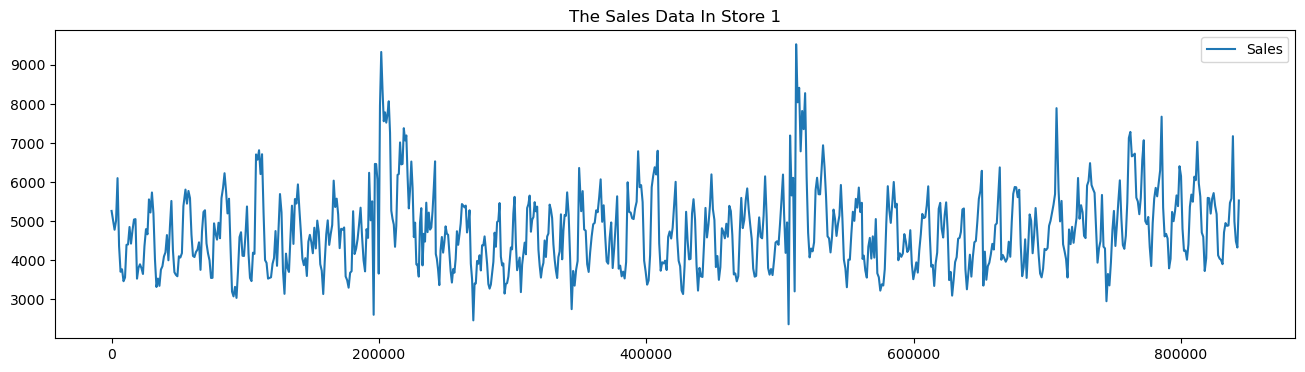

In [18]:
train[train['Store'] == 1][['Sales']].plot(title='The Sales Data In Store 1', figsize=(16, 4))

View the graph of sales data from January 2013 to month 2015 for the store with serial number 1 to get a visual sense of the overall character of the change in the data.

### 2.2 Plot of univariate distribution

In [19]:
print(train.loc[train['Store'] == 1, 'Sales'].isnull().sum())
print(train.loc[train['Store'] == 1, 'Sales'].dtype)


0
int64


<Axes: xlabel='Sales', ylabel='Count'>

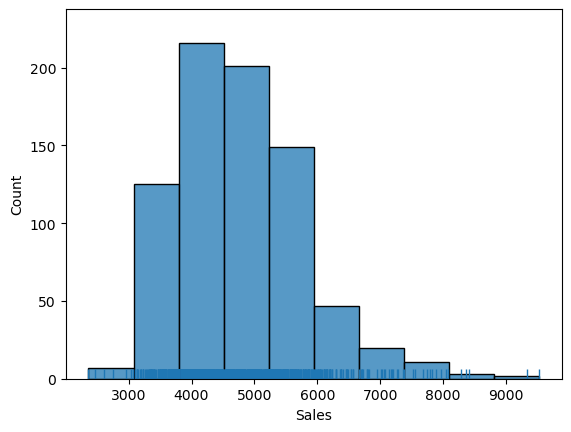

In [20]:
sns.histplot(train.loc[train['Store']==1, 'Sales'], bins=10)

# Add a rug plot
sns.rugplot(train.loc[train['Store']==1, 'Sales'])

### 2.3 Joint Distribution Plots of Binary Variables

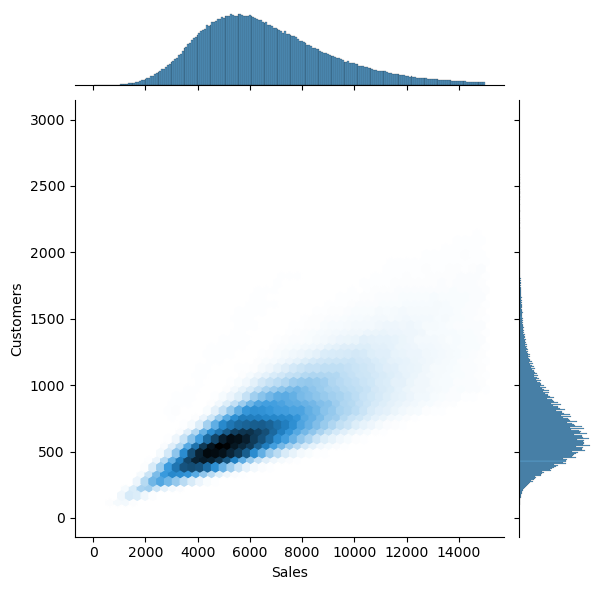

In [21]:
filtered_train = train[(train['Sales'] < 15000) & (train['Customers'] < 3000)]
sns.jointplot(x=filtered_train["Sales"], y=train["Customers"], kind="hex")

Binary variable correlation analysis plotting can help us visualize the correlation between two columns of data, in the above figure we can easily observe that there is a certain linear relationship between customer flow and sales flow.

### 2.4 Heat map

Applied to the corr() function in Pandas, the correlation between each column of data is calculated. Here the correlation is the Pearson correlation coefficient

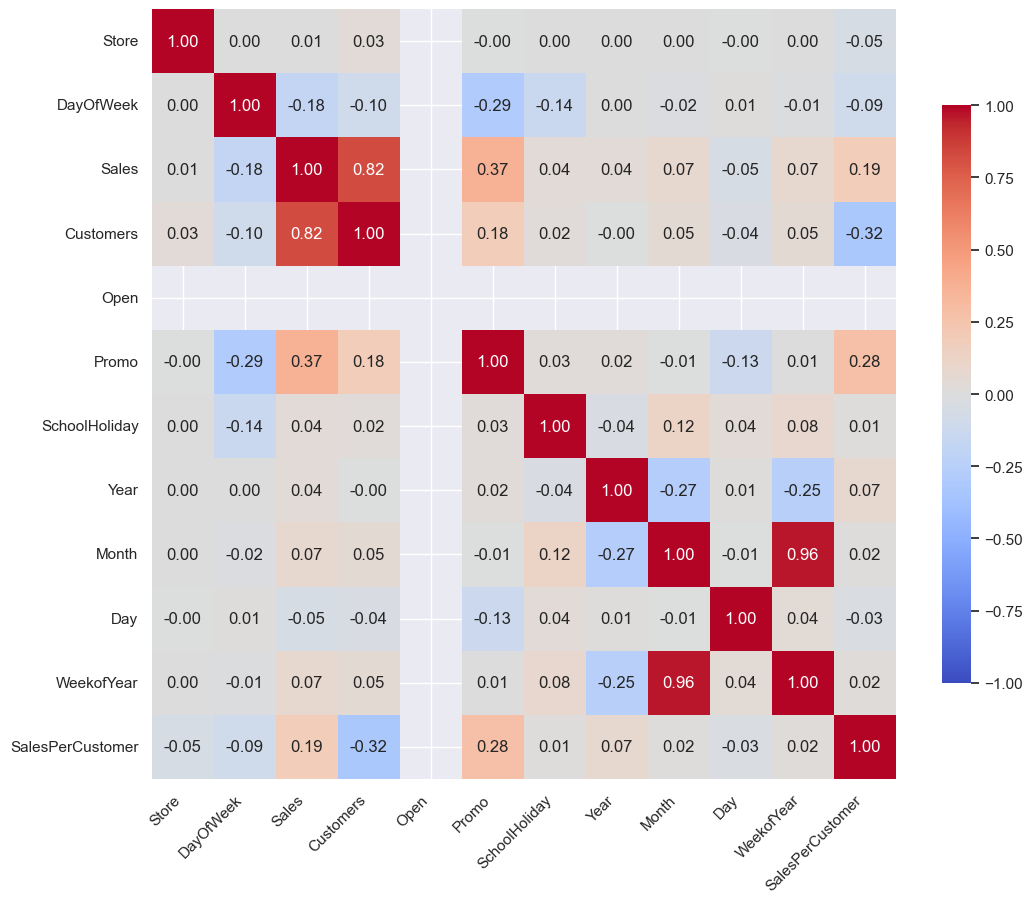

In [22]:
# Setting the canvas size and font size
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.0)

# Generate the correlation matrix
train_corr = train.corr(numeric_only=True)

# Generate the heatmap
ax = sns.heatmap(
    train_corr,
    annot=True,
    fmt=".2f",
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='coolwarm',
    cbar_kws={"shrink": 0.75}  
)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Display the plot
plt.show()

The above graph shows that many of the parameters have some positive or negative correlation with each other, meaning that there is some correlation between these data, which means that we can classify or regress these data using machine learning models.

#### Store types
In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

In [23]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')
print("In total: ", train_store.shape)

In total:  (844338, 22)


In [24]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B has the highest average of Sales among all others, however we have much less data for it.

In [25]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Clearly stores of type A. StoreType D goes on the second place in both Sales and Customers.

c:\Users\jerry\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


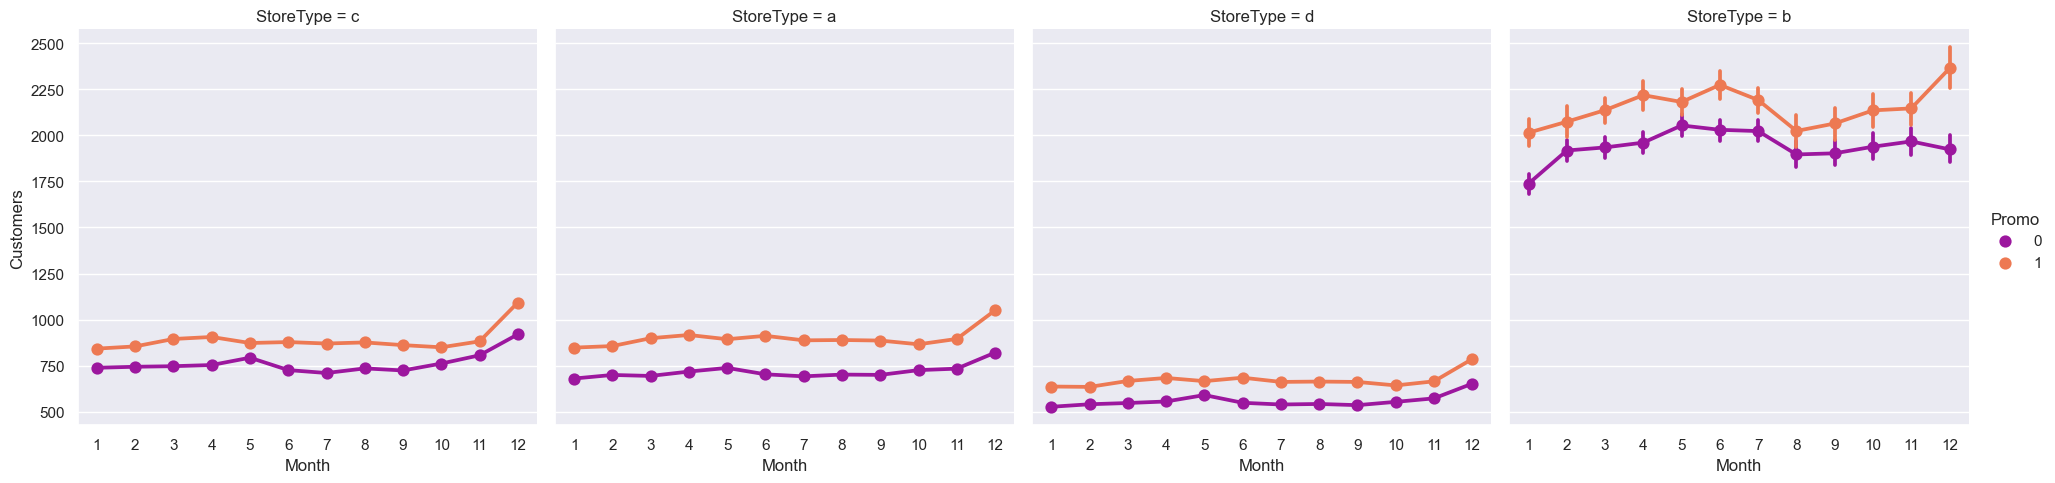

In [26]:
sns.catplot(
    data=train_store,
    x='Month',
    y='Customers',
    col='StoreType',   # Create separate plots for each StoreType
    palette='plasma',  # Use the plasma color palette
    hue='Promo',       # Differentiate by Promo within each plot
    kind='point'       # Use point plot to show trends over time
)


All store types follow the almost same trend but at different scales depending on the presence of the promotion and StoreType itself.

We can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.

c:\Users\jerry\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


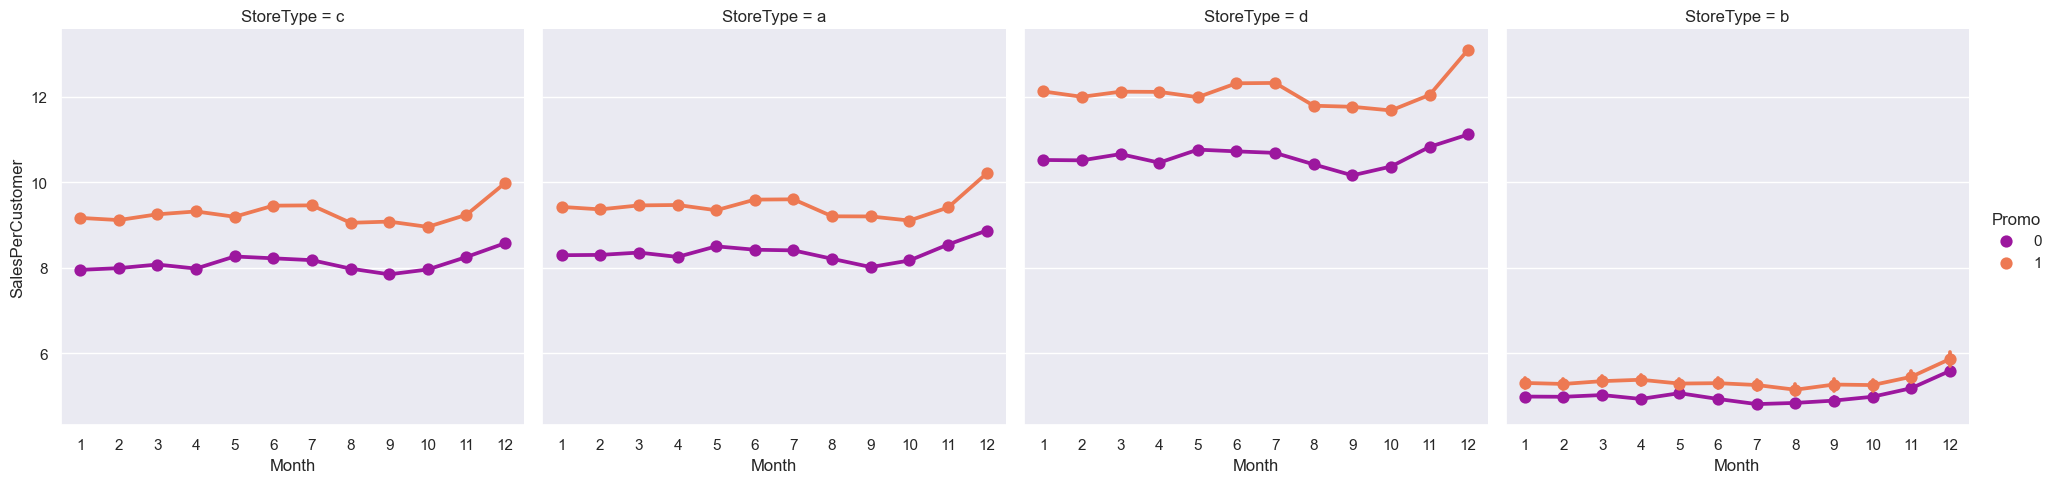

In [27]:
sns.catplot(
    data=train_store,
    x='Month',
    y='SalesPerCustomer',
    col='StoreType',   # Create separate plots for each StoreType
    palette='plasma',  # Use the plasma color palette
    hue='Promo',       # Differentiate by Promo within each plot
    kind='point'       # Use point plot to show trends over time
)

Eventhough the plots above showed StoreType B as the most selling and performant one, in reality it is not true. The highest SalePerCustomer amount is observed at the StoreType D.

Low SalePerCustomer amount for StoreType B describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.

c:\Users\jerry\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


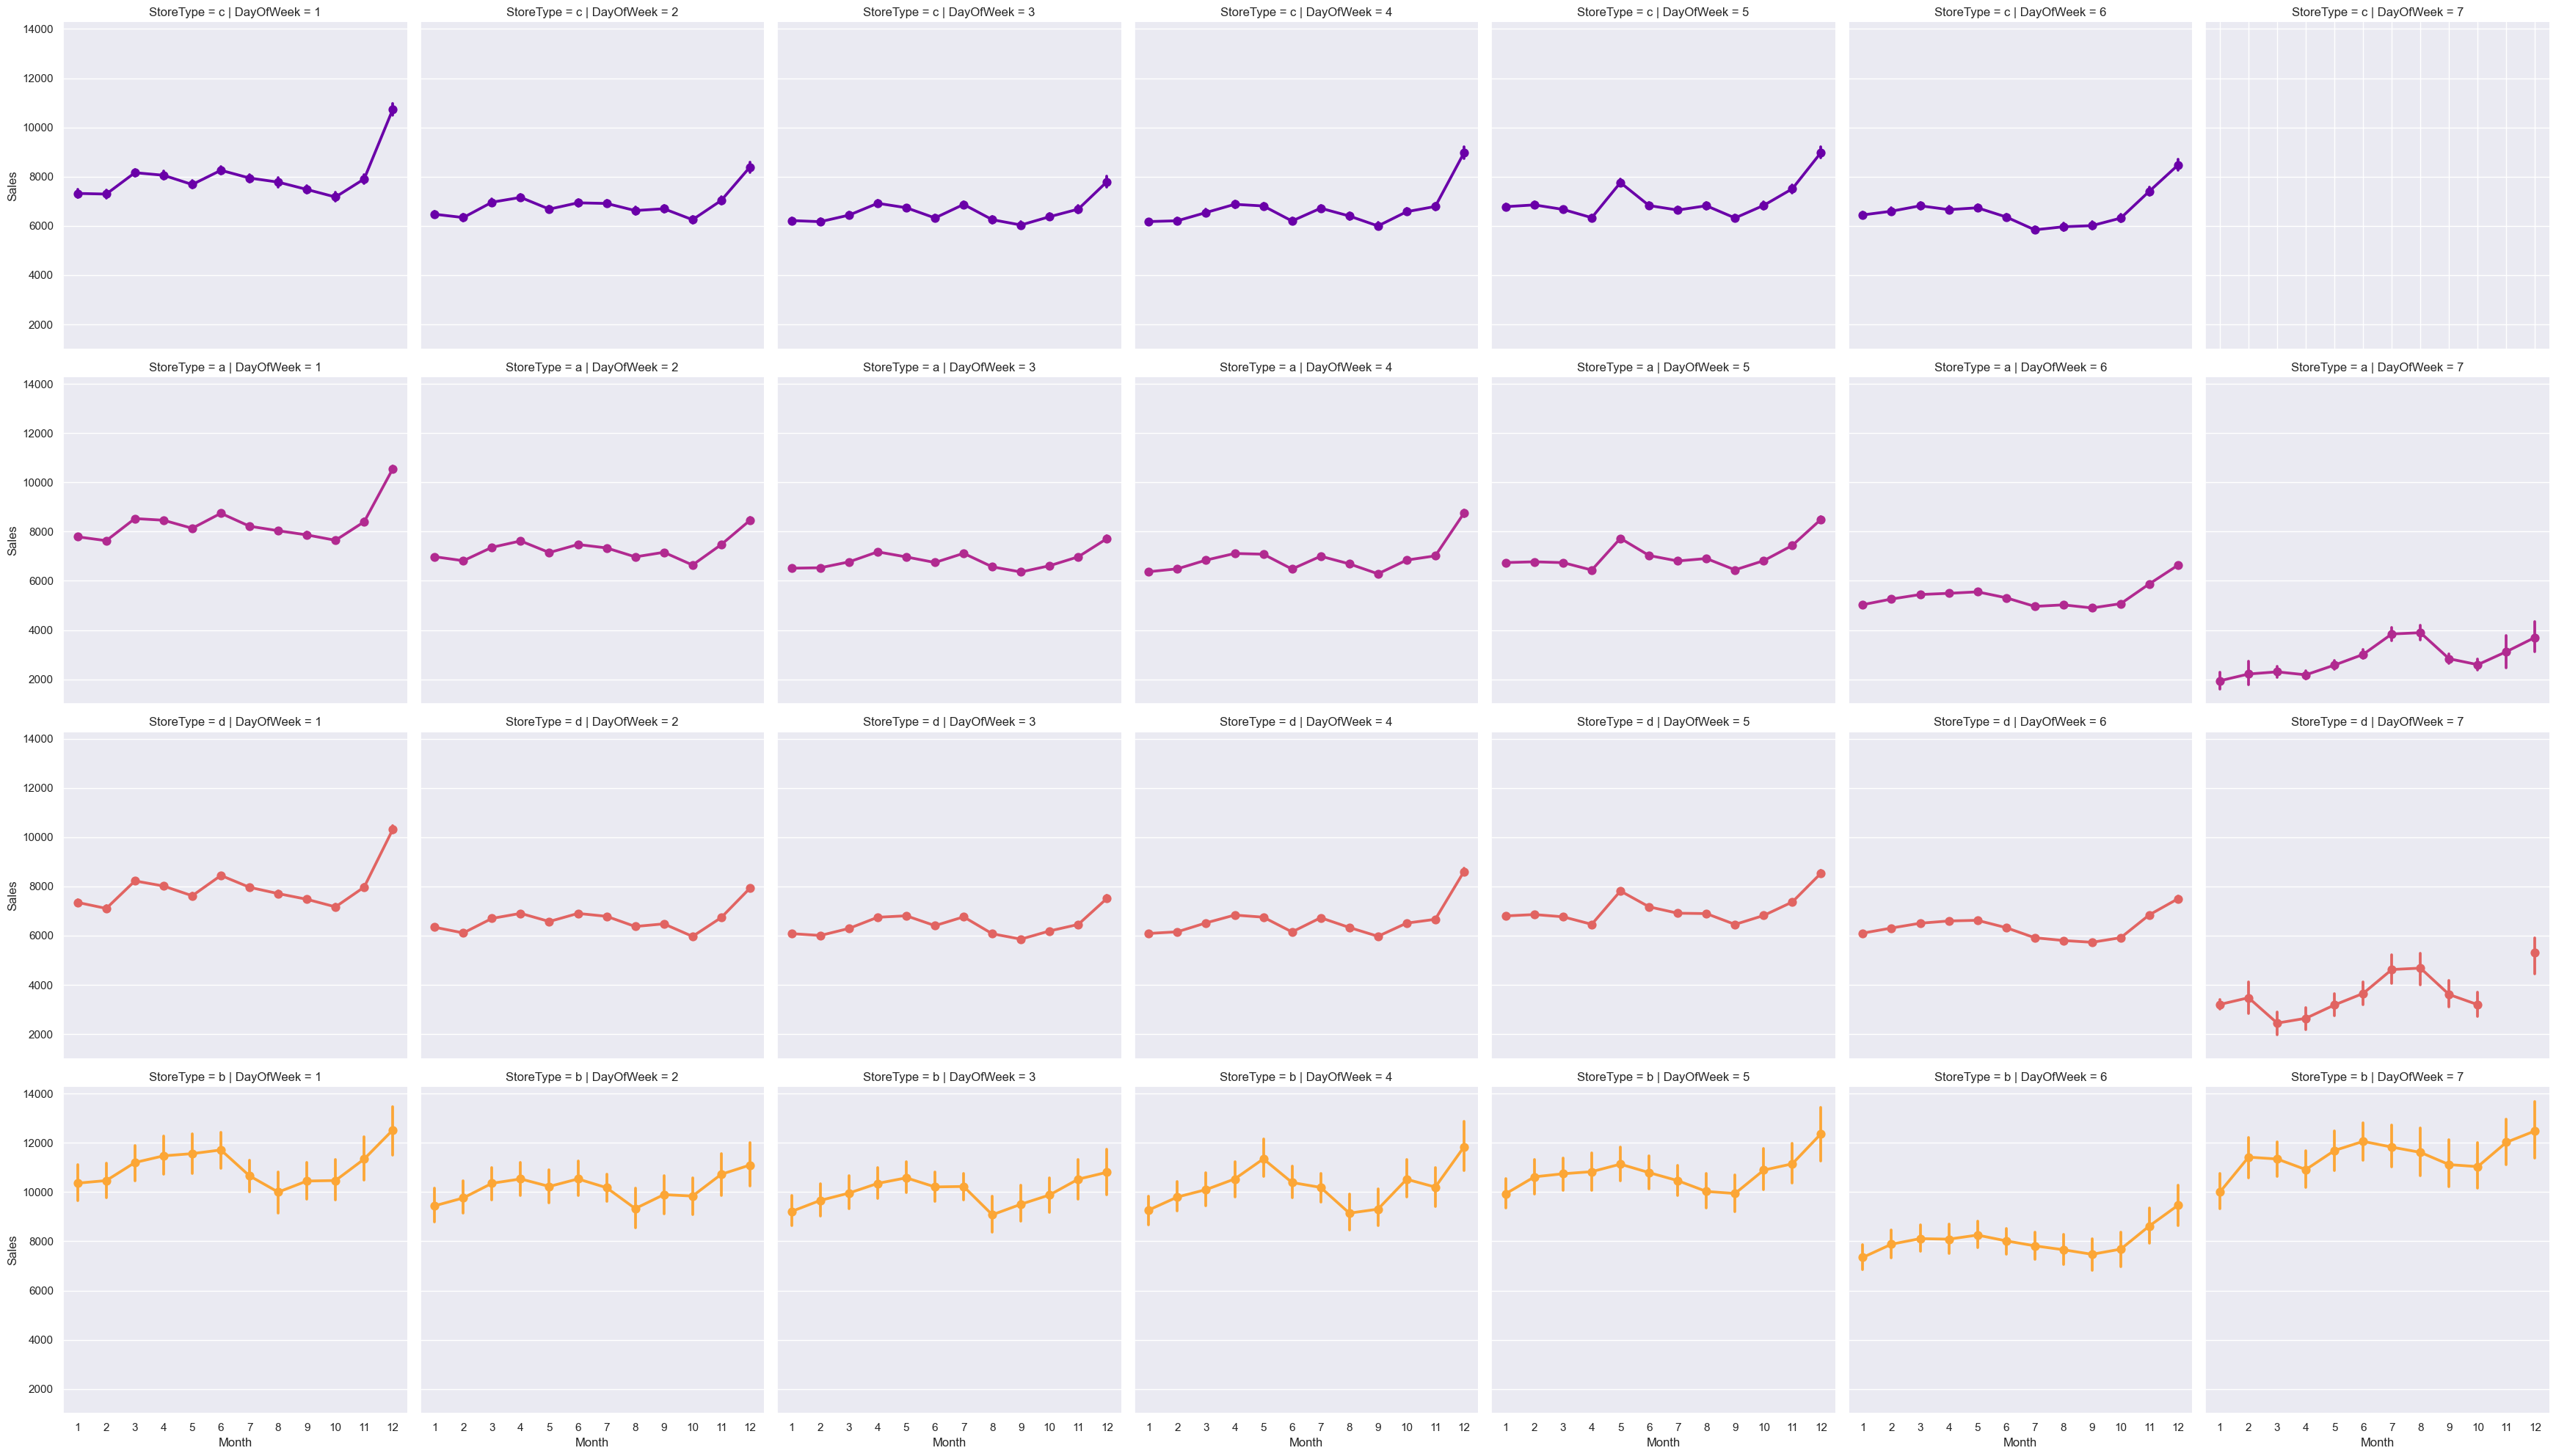

In [28]:
sns.catplot(
    data=train_store,
    x='Month',
    y='Sales',
    col='DayOfWeek',   # Separate plots by the day of the week
    palette='plasma',  # Use the plasma color palette
    hue='StoreType',   # Differentiate data points by StoreType
    row='StoreType',   # Separate plots by StoreType into different rows
    kind='point'       # Use point plot to show trends over time
)

c:\Users\jerry\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


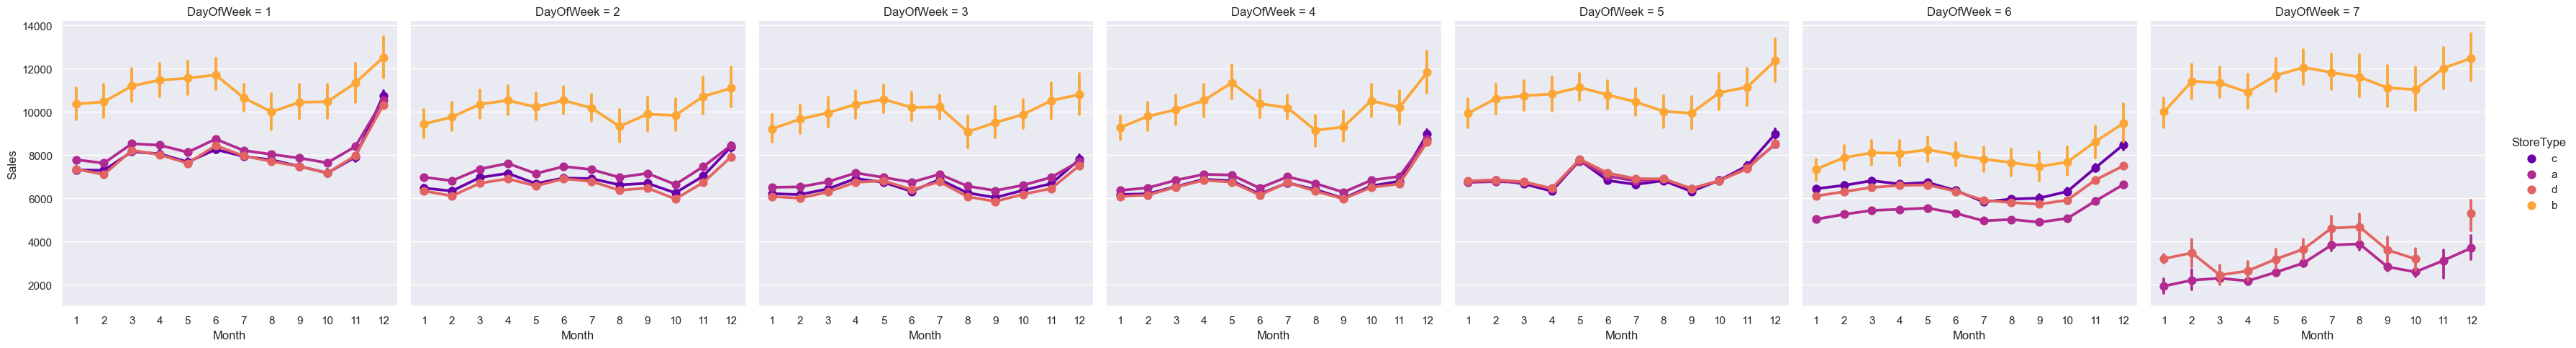

In [29]:
sns.catplot(
    data=train_store,
    x='Month',
    y='Sales',
    col='DayOfWeek',   # Separate plots by the day of the week
    palette='plasma',  # Use the plasma color palette
    hue='StoreType',   # Differentiate data points by StoreType
    kind='point',      # Use point plot to show trends over time
)


We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only from October to December.

For most of stores, it seems like the sales is lower in Sundays, while store type B have the highest sales over the week, which is quiet interesting.

In [30]:
# stores which are opened on Sundays
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

In [31]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)

# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekofYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.

### Conclusion of EDA
- The most selling and crowded StoreType is A.
- The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. We could also assume that the stores of this types are situated in the rural areas, so that customers prefer buying more but less often.
- Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for small things. - Which can also indicate to the label of this store type - "urban" - as it's more accessible for public, and customers don't mind shopping there from time to time during a week.
- Customers tends to buy more on Mondays when there's one promotion running (Promo) and on Sundays when there is no promotion at all (both Promo and Promo1 are equal to 0).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.